<a href="https://colab.research.google.com/github/44REAM/CEB-image_processing/blob/main/Frequency_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Frequency domain, image restoration and image reconstruction

---

Slide Aj Ratchainan 2, 4

# Concepts

https://www.youtube.com/watch?v=spUNpyF58BY

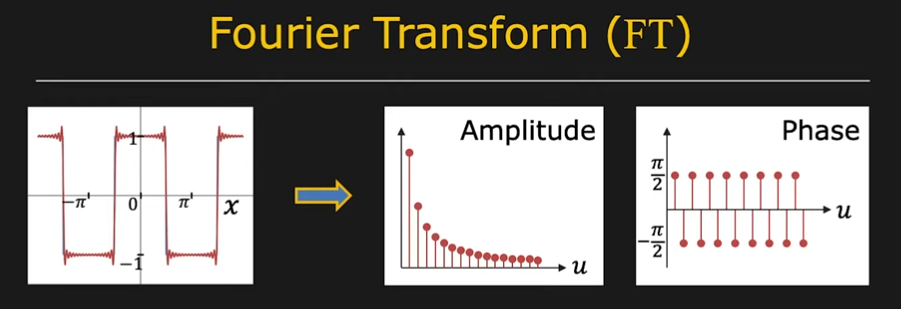

## Why fourier transform

- Provide insights, what is mean to be "smoothing image", "edge in the image".
- Computational efficient (multiplication in frequency domain is convolution in spatial domain)
- Alternative data representation or alternative recording.

## Fourier series

Function f(t) that is a periodic function with period $T$ can be written in the form of summation of sines and cosines functions multipled by a cofficient.

$$f(t) = \frac{a_0}{2} + \sum^∞_{n= 0}( a_n cos(\frac{2πn}{T}t) + b_n sin(\frac{2πn}{T}t) )$$

with some algebratic manipulation using Euler's formula ($e^{iθ} = \text{cos}θ + i\text{sin}(θ)$)


> $$f(t) =\sum^∞_{n= -∞} c_n e^{i2πnt/T} $$




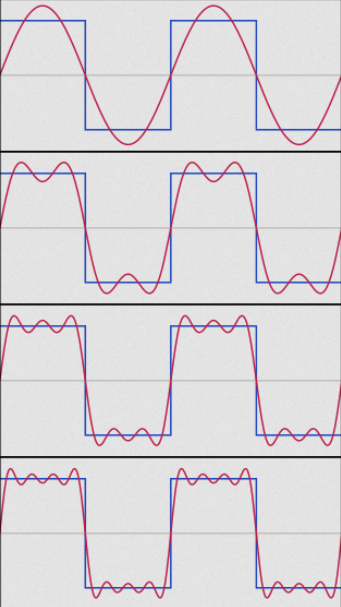

https://en.wikipedia.org/wiki/Fourier_series

We want to find cofficient of complex exponential $c_n$. Because $e^{i2πnt/T}$ and $e^{-i2πmt/T}$ are orthogonal to each other when $n \neq m$. We can find $c_n$ by 

> $$c_n = \frac{1}{T} \int^{T/2}_{-T/2} f(t)e^{-i2πnt/T} dt \tag{*}$$

**Further reading**

https://www.youtube.com/watch?v=UKHBWzoOKsY



## Fourier transform



When f(t) is not a periodic function, we can use fourier transform. Denote that fourier transform ($\mathcal{F}$) of $f(t)$ can be written by 
$$\mathcal{F}(f(t)) = F(μ)$$.

and inverted fourier transform can be written by

$$\mathcal{F}^{-1}(F(μ)) = f(t)$$

Relation to fourier series

$$f(t) = \sum^∞_{n= -∞} c_n e^{i2πnt/T}$$

we can find fourier series of $f(t)$ ($f(t)$ can be non-periodic function) by let $T → ∞$

> $$\text{lim}_{T → ∞} f(t) = ∫^{∞}_{-∞} F(μ) e^{j2πμt} dμ \tag{1}$$

Then we can find $F(μ)$ by using orthogonal property of $e^{j2πμt}$.

> $$F(μ) = ∫^{∞}_{-∞} f(t)e^{-j2πμt} dt \tag{2}$$

Equation (1) and (2) are related to each other which called Fourier transform pair, denote as $f(t) ⇔ F(μ)$.  The double arrow indicates that the expression on the right is obtained by taking the forward Fourier transform of the expression on the left, while the expression on the left is obtained by taking the inverse Fourier transform of the expression on the right.

## Fourier transform property $f(t) ⇔ F(\mu)$

https://en.wikipedia.org/wiki/Fourier_transform#Basic_properties

## Discrete fourier transform
In practice, we have discrete function instead of continuous function. 

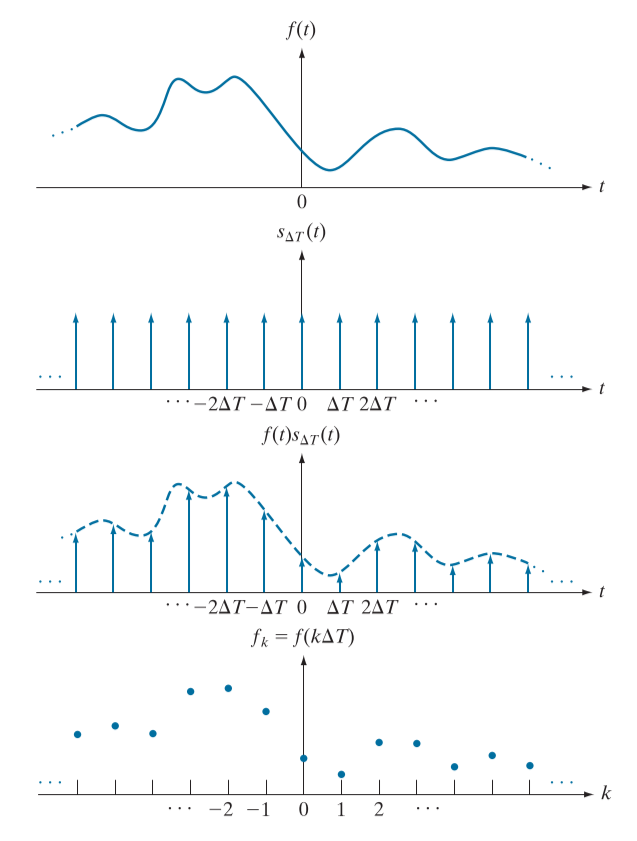




### Sampling and aliasing

We can convert continuous function into sequence of discrete values by sampling and quantization. For a continuous function $f(t)$ we sampling at uniform intervals, $T$, we can sampling the function by multiply the function to train of discrete impulse $p(t)$.

$$f'(t) = f(t)×p(t)$$

for

$$p(t) = ∑^∞_{n = -∞} δ(t-nT)$$

because $p(t)$ is periodic function we can write the above equation in fourier series

$$p(t) = ∑^∞_{n = -∞} p_k e^{i2πnt/T}$$

for

$$p_k = \frac{1}{T}∫^{T/2}_{t = -T/2}  δ(t) e^{-j2πkt/T} dt = \frac{1}{T}$$

Then we find fourier transform, $\mathcal{F}(p(t)) = P(μ)$

$$P(μ) = \mathcal{F}(\frac{1}{T}∑^∞_{n = -∞} e^{i2πnt/T}) = \frac{1}{T} ∑^∞_{n = -∞} δ(μ - \frac{n}{T})$$

**Convolution animation**

https://phiresky.github.io/convolution-demo/

https://github.com/phiresky/convolution-demo

### Nyquist rate

$$\frac{1}{T} > 2\mu_{max}$$


let $F'(\mu)$ be a fourier transform of the sampling function $f'(t)$

$$F'(\mu) = \mathcal{F}(f'(t)) = \mathcal{F}( f(t)×p(t))$$
$$F'(\mu) = ∫^∞_{-∞} ∑^∞_{n = -∞} f(t) δ(t-nT) e^{-i2πμt} dt$$
$$F'(\mu) = ∑^∞_{n = -∞} f(nT) e^{-i2πμnT} $$

Because we know that $F'(μ)$ is periodic ($F'(μ) = F'(μ + 1/T)$), we write $ω = 2πμT$, we got

> $$F'(ω) = ∑^∞_{n = -∞} f[n] e^{-iω n} \tag{3}, ω ∈ [0, 2π )$$


The equation (3) is call discrete time fourier transform (DTFT).

In computer, we want to obtain $M$ equally spaced samples of $F'(μ)$ taken over $μ ∈ [0, 1/T)$, we set $μ = \frac{m}{MT}$, we got

$$F_m = ∑^∞_{n = -∞} f[n] e^{-i2πnm/M}$$

> $$F_m = ∑^{M-1}_{n = 0} f[n] e^{-i2πnm/M} \tag{4}, m = 0,1,2,...,M-1$$

The equation (4) is call discrete fourier transform (DFT). You can view DFT as the sample of DTFT.

## Summary

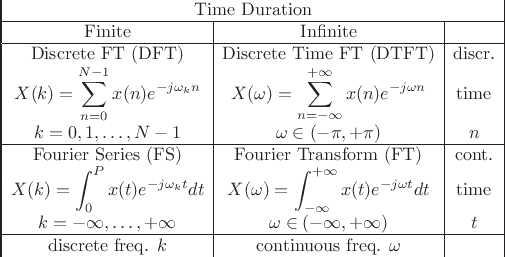

# Fast fourier transform

DFT is not practical because its computational time. In practice we use fast fourier transform (FFT) instead.

# 2D fourier transform

2D DFT is written below

$$F[u,v] = ∑_{x=0}^{N-1} ∑_{y=0}^{M-1} f[x, y] e^{-j2πux/N} e^{-j2πvy/M}$$

Further study

https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

## Coding fourier transform

In [16]:
!git clone https://github.com/44REAM/CEB-image_processing.git
%cd /content/CEB-image_processing

Cloning into 'CEB-image_processing'...
remote: Enumerating objects: 218, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 218 (delta 46), reused 5 (delta 2), pack-reused 139
Receiving objects: 100% (218/218), 8.57 MiB | 14.04 MiB/s, done.
Resolving deltas: 100% (118/118), done.
/content/CEB-image_processing


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

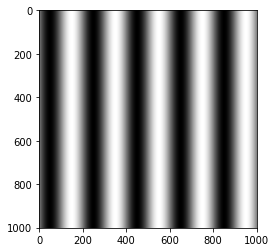

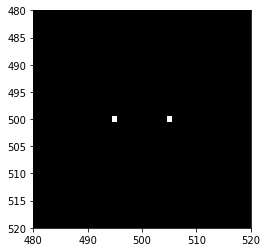

In [ ]:


x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 200
grating = np.sin(2 * np.pi * X / wavelength)
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

freq = np.fft.fftfreq(len(x), d = 1/400)
freq = np.fft.fftshift(freq)

ft = np.fft.fft2(grating)
ft = np.fft.fftshift(ft)

plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  
plt.show()

# Note that the plot below we ignore the phase information

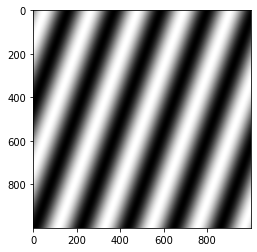

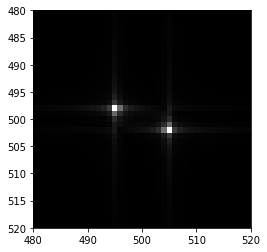

In [ ]:
x = np.arange(0,1000, 1)
X, Y = np.meshgrid(x, x)
wavelength = 200
angle = np.pi / 9
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()


ft = np.fft.fft2(grating)
ft = np.fft.fftshift(ft)

plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480]) 
plt.show()

## Coding inverted fourier transform

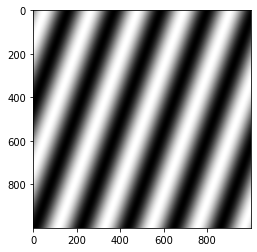

In [ ]:

ift = np.fft.ifftshift(ft)
ift = np.fft.ifft2(ift)

plt.imshow(ift.real)

plt.show()

## Note amplitude vs phase

- View amplitude as relative prominence of sinusoids
- View phase as relative displacement of sinusoids

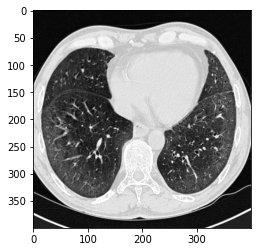

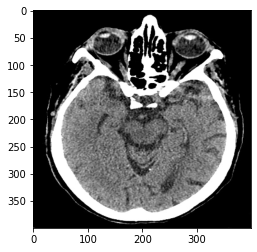

In [ ]:
ct_chest = cv2.imread('data/ct_chest.jpg')
ct_chest = cv2.cvtColor(ct_chest, cv2.COLOR_BGR2GRAY)
ct_chest = cv2.resize(ct_chest, (400,400), interpolation = cv2.INTER_CUBIC)

ct_brain = cv2.imread('data/ct.jpeg')
ct_brain = cv2.cvtColor(ct_brain, cv2.COLOR_BGR2GRAY)
ct_brain = cv2.resize(ct_brain, (400,400), interpolation = cv2.INTER_CUBIC)


plt.imshow(ct_chest, cmap = 'gray')
plt.show()

plt.imshow(ct_brain, cmap = 'gray')
plt.show()

# calculate fft from ct chest
ft = np.fft.fft2(ct_chest)
ft = np.fft.fftshift(ft)

# get amplitude and phase for ct chest
amp_ct_chest = abs(ft)
phase_ct_chest = ft/amp_ct_chest

# calculate fft from ct brain
ft = np.fft.fft2(ct_brain)
ft = np.fft.fftshift(ft)

# get amplitude and phase from ct brain
amp_ct_brain = abs(ft)
phase_ct_brain = ft/amp_ct_brain

### inverted fourier only amplitude

<ipython-input-43-73862382bc09>:4: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(ift.real))


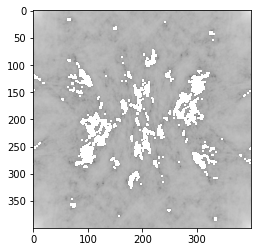

In [ ]:
ift = np.fft.ifftshift(amp_ct_brain)
ift = np.fft.ifft2(ift)

plt.imshow(np.log(ift.real))

plt.show()

### inverted fourier only phase

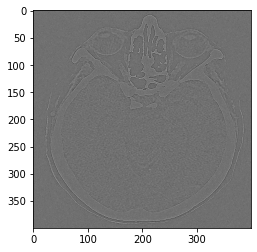

In [ ]:
ift = np.fft.ifftshift(phase_ct_brain)
ift = np.fft.ifft2(ift)

plt.imshow(ift.real)

plt.show()

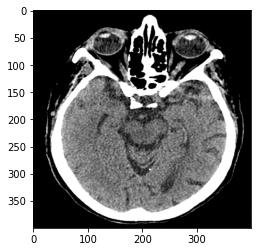

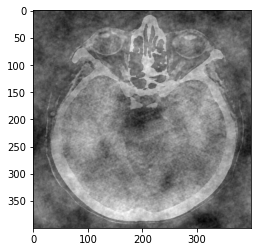

In [ ]:
ift = np.fft.ifftshift(phase_ct_brain*amp_ct_brain)
ift = np.fft.ifft2(ift)

plt.imshow(ift.real)

plt.show()

ift = np.fft.ifftshift(phase_ct_brain*amp_ct_chest)
ift = np.fft.ifft2(ift)

plt.imshow(ift.real)

plt.show()

# Applications

## Filtering in frequency domain

Filtering in frequency domain is more inutitive than filtering in spatial domain. 

$$f'(t) = \text{Real} [ \mathcal{F}^{-1}(F(u,v)H(u,v))]$$

where $F(u, v)$ is DFT of the input image $f(t)$, $H(u,v)$ is a filter transfer function and $f'(t)$ is filtered image.

### Lowpass filter

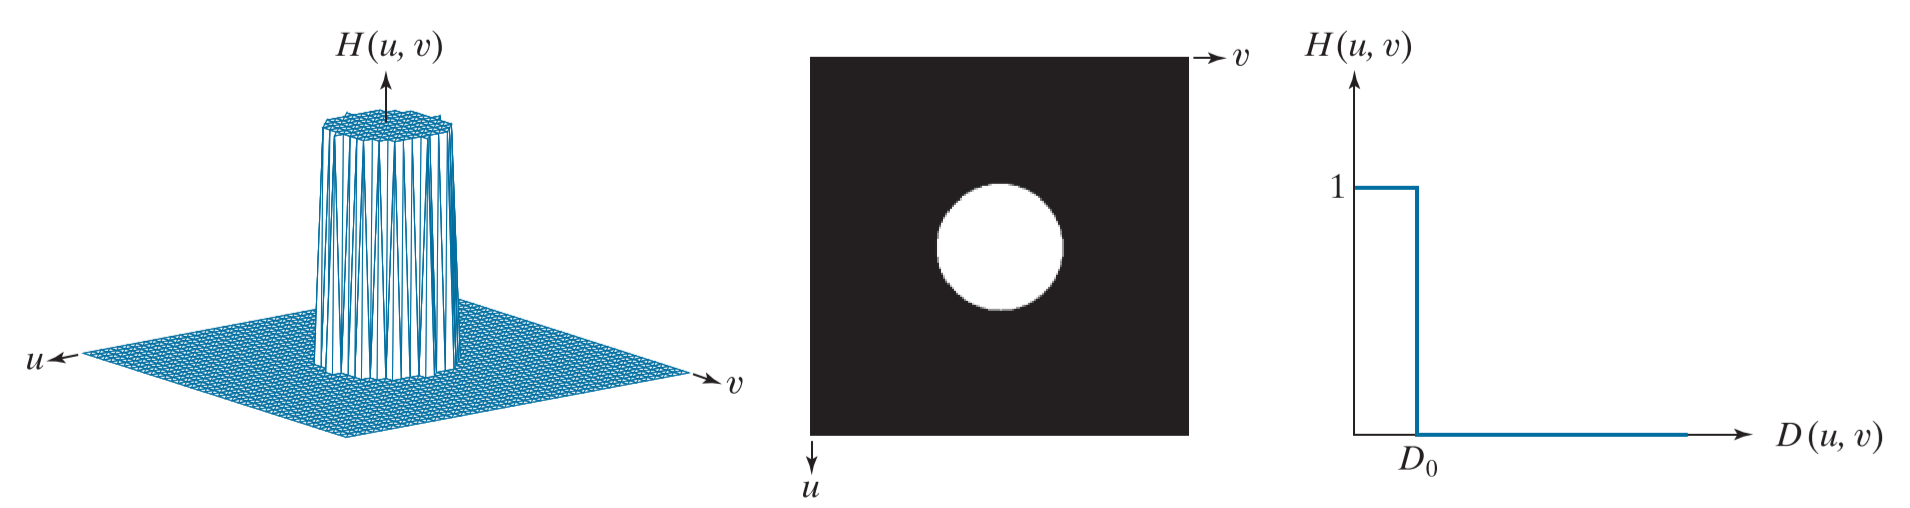

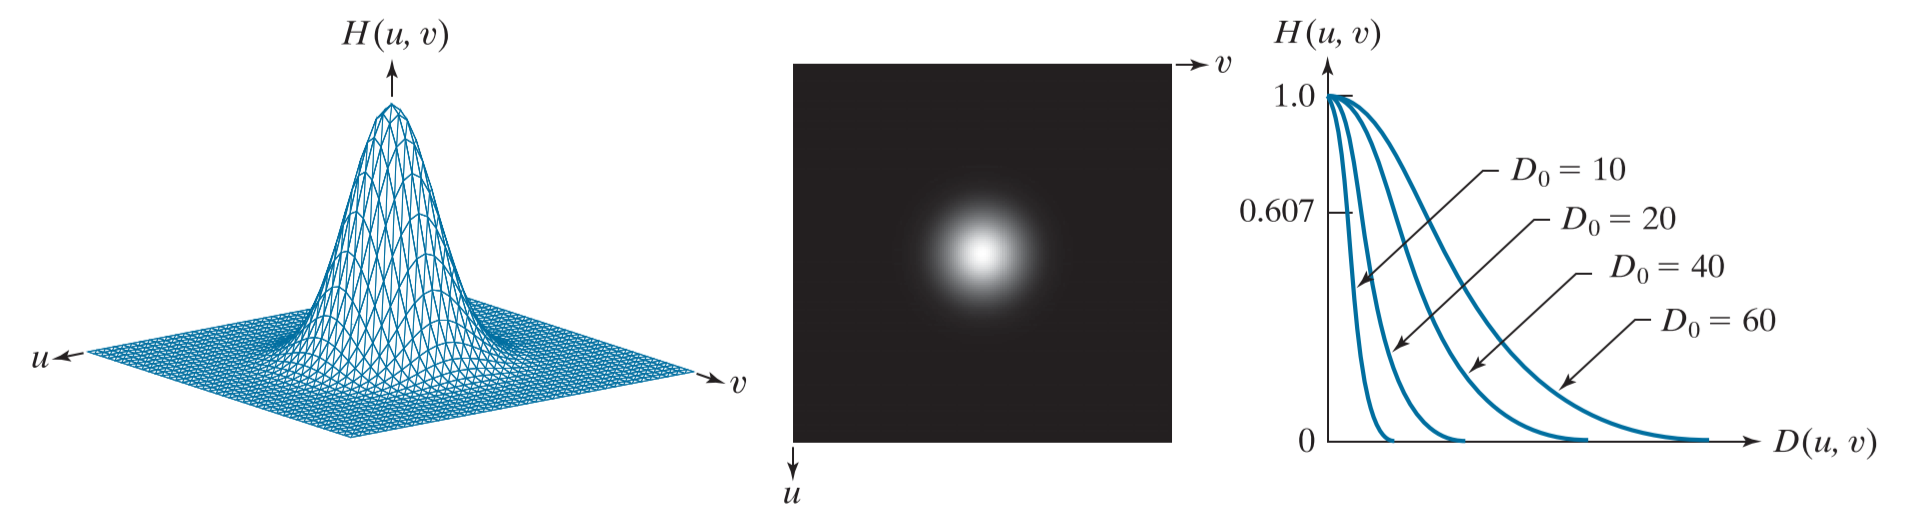

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussian_lowpass(d0,img_shape):
    base = np.zeros(img_shape[:2])
    rows, cols = img_shape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(d0**2))))
    return base

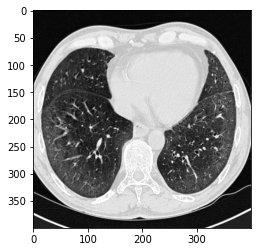

In [19]:
ct_chest = cv2.imread('data/ct_chest.jpg')
ct_chest = cv2.cvtColor(ct_chest, cv2.COLOR_BGR2GRAY)
ct_chest = cv2.resize(ct_chest, (400,400), interpolation = cv2.INTER_CUBIC)

plt.imshow(ct_chest, cmap = 'gray')
plt.show()

# calculate fft from ct chest
ft = np.fft.fft2(ct_chest)
ft = np.fft.fftshift(ft)

# get amplitude and phase for ct chest
amp_ct_chest = abs(ft)
phase_ct_chest = ft/amp_ct_chest


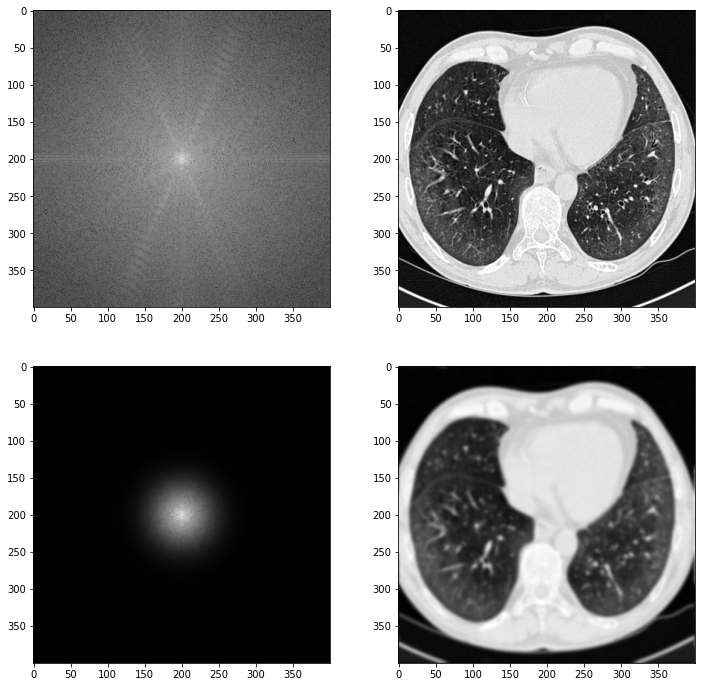

In [42]:
lp_filter = gaussian_lowpass(30, amp_ct_chest.shape)

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(np.log(amp_ct_chest), cmap = 'gray')


plt.subplot(2, 2, 2)
plt.imshow(ct_chest, cmap = 'gray')


plt.subplot(2, 2, 3)
plt.imshow(np.log(amp_ct_chest)*(lp_filter), cmap = 'gray')


plt.subplot(2, 2, 4)
ift = np.fft.ifftshift(phase_ct_chest*amp_ct_chest*lp_filter)
ift = np.fft.ifft2(ift)
plt.imshow(ift.real, cmap = 'gray')
plt.show()


### Highpass filter

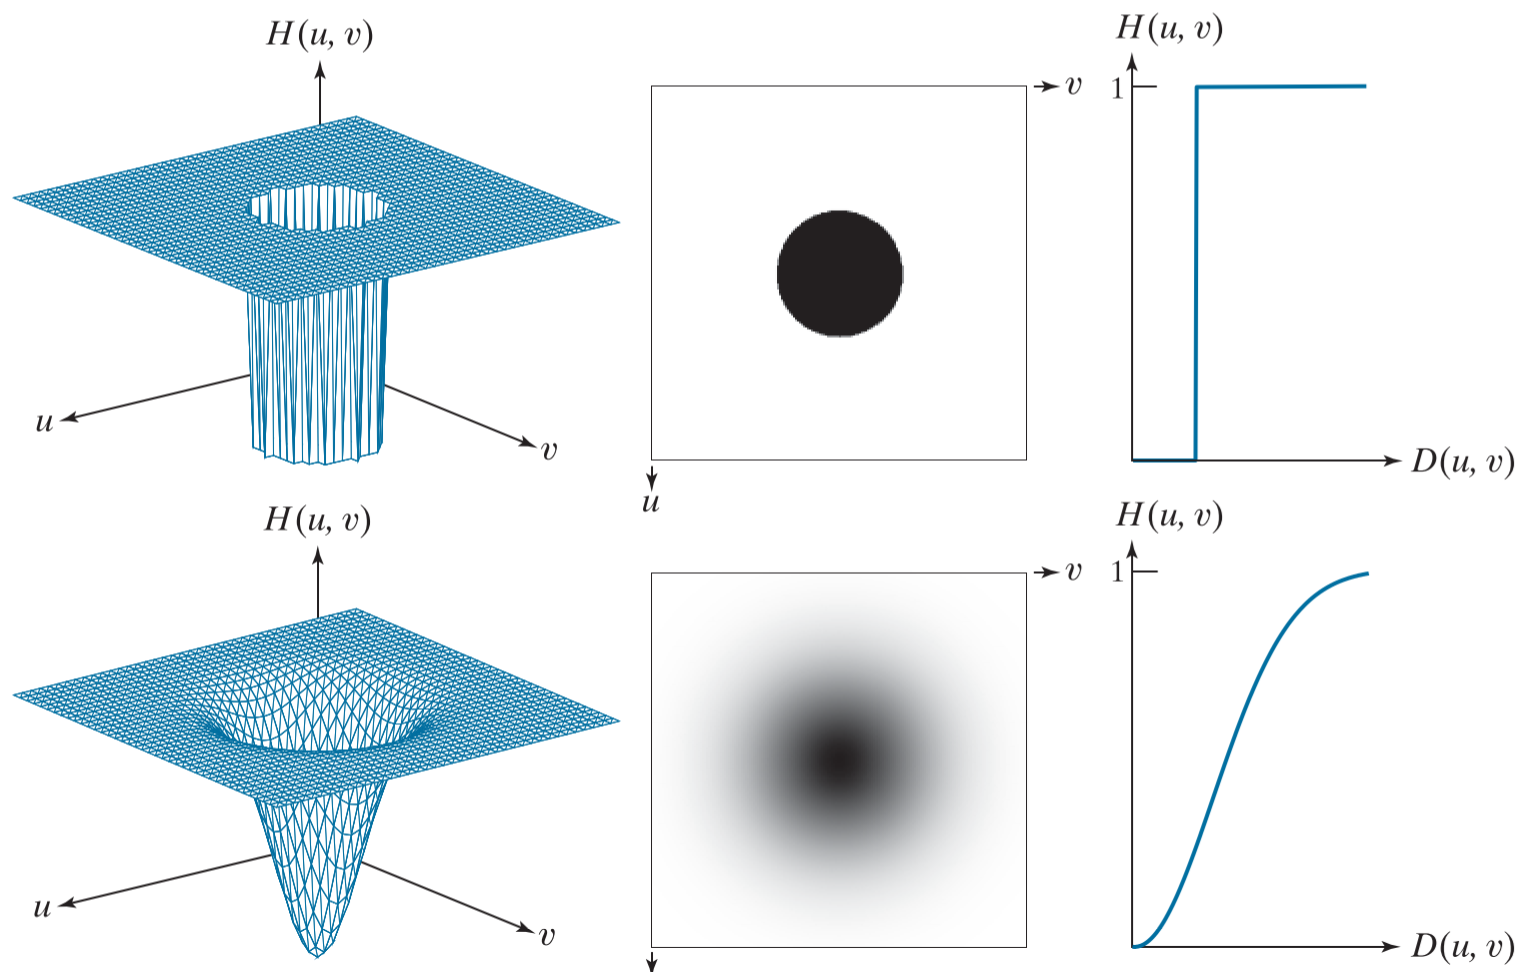

### Notch filter

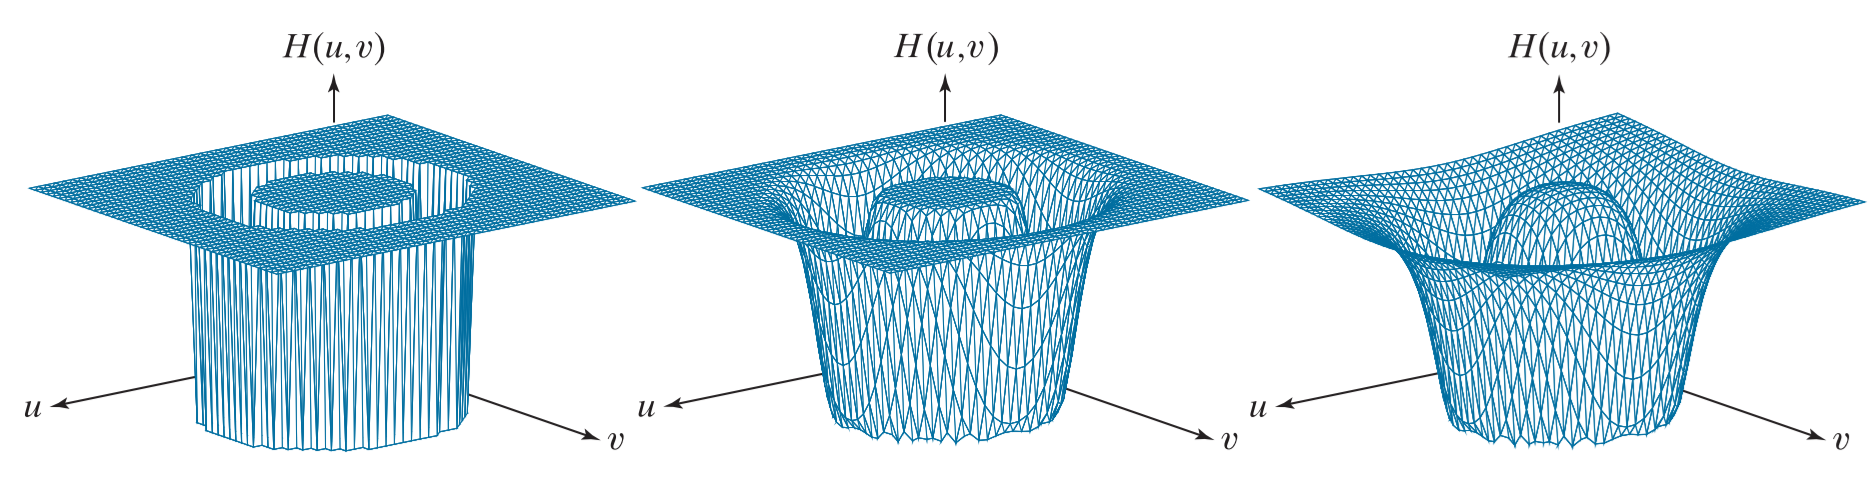

## Image restoration

## CT image reconstruction